<a href="https://colab.research.google.com/github/ltrento1903/S-OP3/blob/main/Caminh%C3%B5es2017.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
import pandas as pd
from prophet import Prophet
from google.colab  import files

uploaded = files.upload()

caminhão = pd.read_excel('LIC_CAMIN_NAC_MES_2017.xlsx', decimal='.')

print(caminhão)




Saving LIC_CAMIN_NAC_MES_2017.xlsx to LIC_CAMIN_NAC_MES_2017 (2).xlsx
          mês  lic_cam_nac
0  2017-01-01         2848
1  2017-02-01         2505
2  2017-03-01         3921
3  2017-04-01         3338
4  2017-05-01         3953
..        ...          ...
78 2023-07-01         7811
79 2023-08-01         8600
80 2023-09-01         8207
81 2023-10-01         8845
82 2023-11-01         8699

[83 rows x 2 columns]


In [100]:
caminhão

,mês,lic_cam_nac
0,2017-01-01,2848
1,2017-02-01,2505
2,2017-03-01,3921
3,2017-04-01,3338
4,2017-05-01,3953
...,...,...
78,2023-07-01,7811
79,2023-08-01,8600
80,2023-09-01,8207
81,2023-10-01,8845


In [101]:
# Transformação de Date em formato de datetime
caminhão['mês'] = pd.to_datetime(caminhão.mês, infer_datetime_format=True)
caminhão

,mês,lic_cam_nac
0,2017-01-01,2848
1,2017-02-01,2505
2,2017-03-01,3921
3,2017-04-01,3338
4,2017-05-01,3953
...,...,...
78,2023-07-01,7811
79,2023-08-01,8600
80,2023-09-01,8207
81,2023-10-01,8845


In [102]:
# Renomear colunas
caminhão_1 = caminhão.rename(columns={"mês": "ds", "lic_cam_nac": "y"})
caminhão_1

,ds,y
0,2017-01-01,2848
1,2017-02-01,2505
2,2017-03-01,3921
3,2017-04-01,3338
4,2017-05-01,3953
...,...,...
78,2023-07-01,7811
79,2023-08-01,8600
80,2023-09-01,8207
81,2023-10-01,8845


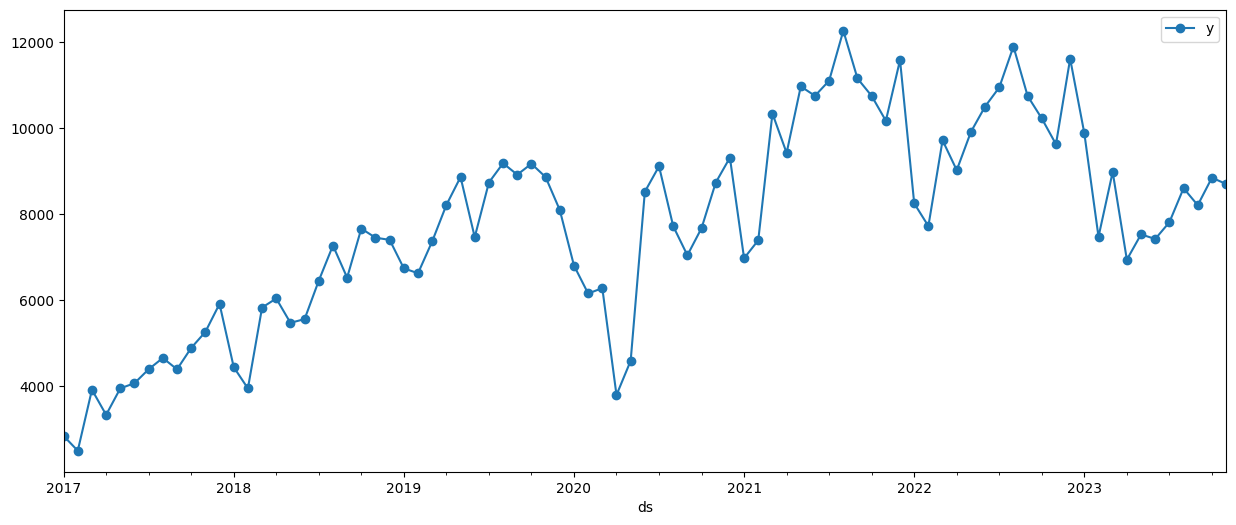

In [103]:
# Gerando o gráfico da série temporal
caminhão_1.plot(x = 'ds', y = 'y', figsize = (15,6), marker='o');

In [104]:
import plotly.express as px

# Supondo que 'caminhão_1' seja o DataFrame contendo sua série temporal
fig = px.line(caminhão_1, x='ds', y='y', title='Licenciamentos Caminhôes', labels={'ds': 'Data', 'y': 'Valores'})

# Adicione pontos de dados como marcadores
fig.update_traces(mode='markers+lines', marker=dict(size=8, symbol='circle'))

# Exiba o gráfico
fig.show()


In [105]:
#instanciando a modelagem

modelo = Prophet()

#Ajustando o modelo aos dados

modelo.fit(caminhão_1)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmbn57yia/bpag12ws.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmbn57yia/d_rxjl8z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10585', 'data', 'file=/tmp/tmpmbn57yia/bpag12ws.json', 'init=/tmp/tmpmbn57yia/d_rxjl8z.json', 'output', 'file=/tmp/tmpmbn57yia/prophet_model47elos3d/prophet_model-20240102183940.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
18:39:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:39:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [106]:
# Criando dataframe com os períodos futuros para as previsões
st_futuro = modelo.make_future_dataframe(
    periods= 36,
    freq = 'm',
    include_history = True

)

In [107]:
previsao_Prophet = modelo.predict(st_futuro)

previsao_Prophet

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-01-01,4229.537094,1697.019724,4642.208289,4229.537094,4229.537094,-1022.780413,-1022.780413,-1022.780413,-1022.780413,-1022.780413,-1022.780413,0.0,0.0,0.0,3206.756681
1,2017-02-01,4327.922917,1834.695046,4601.164242,4327.922917,4327.922917,-1069.951212,-1069.951212,-1069.951212,-1069.951212,-1069.951212,-1069.951212,0.0,0.0,0.0,3257.971705
2,2017-03-01,4416.787531,3094.733752,5884.880509,4416.787531,4416.787531,73.070743,73.070743,73.070743,73.070743,73.070743,73.070743,0.0,0.0,0.0,4489.858274
3,2017-04-01,4515.173354,1955.905369,4650.313383,4515.173354,4515.173354,-1206.891145,-1206.891145,-1206.891145,-1206.891145,-1206.891145,-1206.891145,0.0,0.0,0.0,3308.282209
4,2017-05-01,4610.385441,2682.929312,5442.402703,4610.385441,4610.385441,-555.169851,-555.169851,-555.169851,-555.169851,-555.169851,-555.169851,0.0,0.0,0.0,4055.215589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,2026-06-30,8493.630599,6086.154786,8921.611806,8037.596188,8949.096895,-946.831612,-946.831612,-946.831612,-946.831612,-946.831612,-946.831612,0.0,0.0,0.0,7546.798987
115,2026-07-31,8475.701426,8814.557327,11784.985576,7997.857850,8950.005207,1764.780378,1764.780378,1764.780378,1764.780378,1764.780378,1764.780378,0.0,0.0,0.0,10240.481804
116,2026-08-31,8457.772253,8453.946805,11380.930880,7957.589232,8957.216050,1493.576123,1493.576123,1493.576123,1493.576123,1493.576123,1493.576123,0.0,0.0,0.0,9951.348376
117,2026-09-30,8440.421440,8673.273814,11589.580623,7913.996369,8963.824743,1750.998687,1750.998687,1750.998687,1750.998687,1750.998687,1750.998687,0.0,0.0,0.0,10191.420127


In [108]:
previsao_Prophet[['ds', 'trend', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,trend,yhat,yhat_lower,yhat_upper
0,2017-01-01,4229.537094,3206.756681,1697.019724,4642.208289
1,2017-02-01,4327.922917,3257.971705,1834.695046,4601.164242
2,2017-03-01,4416.787531,4489.858274,3094.733752,5884.880509
3,2017-04-01,4515.173354,3308.282209,1955.905369,4650.313383
4,2017-05-01,4610.385441,4055.215589,2682.929312,5442.402703
...,...,...,...,...,...
114,2026-06-30,8493.630599,7546.798987,6086.154786,8921.611806
115,2026-07-31,8475.701426,10240.481804,8814.557327,11784.985576
116,2026-08-31,8457.772253,9951.348376,8453.946805,11380.930880
117,2026-09-30,8440.421440,10191.420127,8673.273814,11589.580623


In [109]:
import plotly.graph_objects as go
import pandas as pd

# Supondo que 'previsao_Prophet' seja o DataFrame contendo as colunas 'ds', 'trend', 'yhat', 'yhat_lower', 'yhat_upper'

# Selecionando colunas específicas
colunas_selecionadas = previsao_Prophet[['ds', 'trend', 'yhat', 'yhat_lower', 'yhat_upper']]

# Renomeando as colunas
colunas_selecionadas.columns = ['Data', 'Tendência', 'Previsão', 'Limite Inferior', 'Limite Superior']

# Arredondando os valores do DataFrame
colunas_selecionadas = colunas_selecionadas.round(0)


# Criando a tabela
figura_tabela_mix = go.Figure(data=[go.Table(
    header=dict(values=colunas_selecionadas.columns),
    cells=dict(values=colunas_selecionadas.transpose().values.tolist())
)])

# Layout da tabela
figura_tabela_mix.update_layout(
    title="Previsão de Demanda com Limites",
    margin=dict(l=20, r=20, t=40, b=20),  # Margens
)

# Exibindo a tabela
figura_tabela_mix.show()


In [110]:
from google.colab import files

# Exporte o DataFrame para um arquivo Excel temporário
temp_excel_path = '/content/temp_excel_file.xlsx'
previsao_Prophet.to_excel(temp_excel_path, index=False)

# Faça o download do arquivo Excel
files.download(temp_excel_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import seaborn as sns
import plotly.express as px

In [117]:
from google.colab  import files

uploaded = files.upload()

métrica_prophet = pd.read_excel('Bias_MES_profeta2017.xlsx')

print(métrica_prophet)



Saving Bias_MES_profeta2017.xlsx to Bias_MES_profeta2017 (1).xlsx
          Mês  Licenciamentos      Previsão     Resíduos
0  2017-01-01            2848   3206.756681   358.756681
1  2017-02-01            2505   3257.971705   752.971705
2  2017-03-01            3921   4489.858274   568.858274
3  2017-04-01            3338   3308.282209   -29.717791
4  2017-05-01            3953   4055.215589   102.215589
..        ...             ...           ...          ...
78 2023-07-01            7811   9263.100964  1452.100964
79 2023-08-01            8600  10313.261015  1713.261015
80 2023-09-01            8207   9740.966389  1533.966389
81 2023-10-01            8845  10018.038004  1173.038004
82 2023-11-01            8699   9429.299971   730.299971

[83 rows x 4 columns]


In [125]:
import numpy as np
import pandas as pd

# Calculando MAPE
mape = np.mean(np.abs((métrica_prophet['Licenciamentos'] - métrica_prophet['Previsão']) / métrica_prophet['Licenciamentos'])) * 100

# Calculando MAE
mae = np.mean(np.abs(métrica_prophet['Licenciamentos'] - métrica_prophet['Previsão']))
#
print(f"MAPE: {mape:.2f}%")
print(f"MAE: {mae:.2f}")





MAPE: 12.34%
MAE: 883.27


In [126]:
# Calcule o viés como a diferença média entre as previsões e os valores reais
bias = métrica_prophet['Previsão'].mean() - métrica_prophet['Licenciamentos'].mean()

# Calcule a razão do viés como o viés dividido pela média dos valores reais
bias_ratio = bias / métrica_prophet['Licenciamentos'].mean()

# Exiba o viés e a razão do viés
print('Viés:', bias)
print('Razão do Viés:', bias_ratio)

Viés: 0.02229257716680877
Razão do Viés: 2.8841736237512322e-06


In [127]:
import numpy as np
import pandas as pd

# Calculando MAPE
mape = np.mean(np.abs((caminhão_1['y'] - previsao_Prophet['yhat']) / caminhão_1['y'])) * 100

# Calculando MAE
mae = np.mean(np.abs(caminhão_1['y'] - previsao_Prophet['yhat']))


print(f"MAPE: {mape:.2f}%")
print(f"MAE: {mae:.2f}")




MAPE: 12.34%
MAE: 883.27


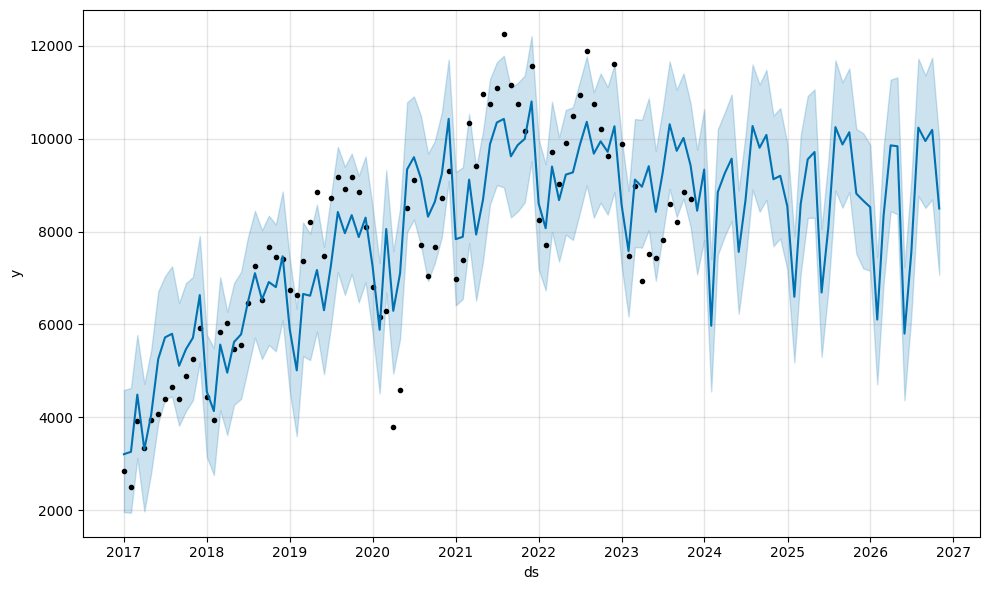

In [129]:
# Fazendo grafico da previsao
grafico_previsao_Prophet = modelo.plot(previsao_Prophet)
grafico_previsao_Prophet.show()

In [130]:
from google.colab import files

# Exporte o DataFrame para um arquivo Excel temporário
temp_excel_path = '/content/temp_excel_file.xlsx'
previsao_Prophet.to_excel(temp_excel_path, index=False)

# Faça o download do arquivo Excel
files.download(temp_excel_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [157]:
import pandas as pd
from prophet import Prophet

# Supondo que 'modelo' seja o seu modelo Prophet treinado

# Criando um DataFrame com datas mensais para previsão (2024 a 2026)
datas_futuras = pd.date_range(start='2024-01-01', end='2026-12-31', freq='M')
st_futuro = pd.DataFrame({'ds': datas_futuras})

# Realizando as previsões para todos os meses de 2024, 2025 e 2026
previsao_Prophet_1 = modelo.predict(st_futuro)

# Visualizando as previsões
print(previsao_Prophet_1[['ds','trend', 'yhat', 'yhat_lower', 'yhat_upper']])


           ds        trend          yhat   yhat_lower    yhat_upper
0  2024-01-31  9003.166131   5973.294212  4623.704369   7349.064866
1  2024-02-29  8986.393679   8852.934599  7541.251611  10207.485171
2  2024-03-31  8968.464506   9260.929039  7864.198193  10632.241868
3  2024-04-30  8951.113693   9572.022515  8185.526700  10996.964853
4  2024-05-31  8933.184520   7563.664988  6101.772922   8971.470559
5  2024-06-30  8915.833707   8678.446033  7384.479865  10075.912125
6  2024-07-31  8897.904534  10275.635645  9026.492016  11578.242186
7  2024-08-31  8879.975361   9807.090116  8400.555714  11264.097288
8  2024-09-30  8862.624548  10083.555901  8776.476743  11431.782863
9  2024-10-31  8844.695375   9128.919811  7762.843110  10502.209815
10 2024-11-30  8827.344563   9202.106121  7813.066274  10474.094457
11 2024-12-31  8809.415390   8547.485925  7155.671391   9940.064020
12 2025-01-31  8791.486217   6597.252250  5276.306364   8067.200745
13 2025-02-28  8775.292125   8595.352274  7224.7

In [160]:
from google.colab import files

# Exporte o DataFrame para um arquivo Excel temporário
temp_excel_path = '/content/temp_excel_file.xlsx'
previsao_Prophet_1.to_excel(temp_excel_path, index=False)

# Faça o download do arquivo Excel
files.download(temp_excel_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [159]:
import plotly.graph_objects as go
import pandas as pd

# Supondo que 'previsao_Prophet' seja o DataFrame contendo as colunas 'ds', 'trend', 'yhat', 'yhat_lower', 'yhat_upper'

# Selecionando colunas específicas
colunas_selecionadas = previsao_Prophet_1[['ds', 'trend', 'yhat', 'yhat_lower', 'yhat_upper']]

# Renomeando as colunas
colunas_selecionadas.columns = ['Data', 'Tendência', 'Previsão', 'Limite Inferior', 'Limite Superior']

# Arredondando os valores do DataFrame
colunas_selecionadas = colunas_selecionadas.round(0)

# Criando a tabela
figura_tabela_futura = go.Figure(data=[go.Table(
    header=dict(values=colunas_selecionadas.columns),
    cells=dict(values=colunas_selecionadas.transpose().values.tolist())
)])

# Layout da tabela
figura_tabela_futura.update_layout(
    title="Previsão de Demanda com Limites",
    margin=dict(l=20, r=20, t=40, b=20),  # Margens
)

# Exibindo a tabela
figura_tabela_futura.show()


In [133]:
# Supondo que 'previsao_Prophet' seja o DataFrame contendo os resultados do Prophet

# Renomeie as colunas
previsao_Prophet = previsao_Prophet.rename(columns={
    'trend':'Tendência',
    'yhat': 'Previsão',
    'yhat_lower': 'Limite Inferior',
    'yhat_upper': 'Limite Superior'
})

# Crie o gráfico com os novos nomes
fig = px.line(previsao_Prophet, x='ds', y=['Tendência','Previsão', 'Limite Inferior', 'Limite Superior'],
              labels={'ds': 'Data', 'value': 'Valores'},
              title='Previsão com Intervalo de Confiança')

# Personalize os títulos dos eixos
fig.update_layout(
    xaxis_title='Data',
    yaxis_title='Valores',
)

# Exiba o gráfico
fig.show()


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab  import files

uploaded = files.upload()

caminhão_SE = pd.read_excel('LIC_CAMIN_NAC_MES_2017.xlsx', index_col=0, parse_dates=True)

print(caminhão_SE)


Saving LIC_CAMIN_NAC_MES_2017.xlsx to LIC_CAMIN_NAC_MES_2017.xlsx
            lic_cam_nac
mês                    
2017-01-01         2848
2017-02-01         2505
2017-03-01         3921
2017-04-01         3338
2017-05-01         3953
...                 ...
2023-07-01         7811
2023-08-01         8600
2023-09-01         8207
2023-10-01         8845
2023-11-01         8699

[83 rows x 1 columns]


In [4]:

y = caminhão_SE.iloc[:, 0]
y

mês
2017-01-01    2848
2017-02-01    2505
2017-03-01    3921
2017-04-01    3338
2017-05-01    3953
              ... 
2023-07-01    7811
2023-08-01    8600
2023-09-01    8207
2023-10-01    8845
2023-11-01    8699
Name: lic_cam_nac, Length: 83, dtype: int64

In [8]:
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd

# Assuming df is your DataFrame with a datetime index and a column 'lic_cam_nac'
# df = ...

# Perform the decomposition
result = seasonal_decompose(caminhão_SE['lic_cam_nac'], model='additive')

# Extract the components
trend = result.trend
seasonal = result.seasonal
residual = result.resid

# Create a Plotly figure
fig = go.Figure()

# Plot the original time series
fig.add_trace(go.Scatter(x=caminhão_SE.index, y=caminhão_SE['lic_cam_nac'], mode='lines', name='Licenciamentos'))

# Plot the trend component
fig.add_trace(go.Scatter(x=caminhão_SE.index, y=trend, mode='lines', name='Trend'))

# Plot the seasonal component
fig.add_trace(go.Scatter(x=caminhão_SE.index, y=seasonal, mode='lines', name='Seasonal'))

# Plot the residual component
fig.add_trace(go.Scatter(x=caminhão_SE.index, y=residual, mode='lines', name='Residual'))

# Update layout
fig.update_layout(title='Seasonal Decomposition',
                  xaxis_title='Date',
                  yaxis_title='Values')

# Show the figure
fig.show()

In [9]:
# Aplicando a suavização exponencial Holt-Winters
modelo = ExponentialSmoothing(caminhão_SE, trend='add', seasonal='add', seasonal_periods=12)
resultado = modelo.fit()

O método de suavização exponencial Holt-Winters é um método recursivo de previsão que modifica as previsões em resposta ao comportamento de séries temporais. Ele é capaz de lidar com dados sazonais e é conhecido como método de suavização exponencial tripla. O método é baseado em três componentes: nível, tendência e sazonalidade¹. O modelo é atualizado a cada período de tempo e é composto por três equações que atualizam as estimativas do nível, tendência e sazonalidade.

In [14]:
# Realizando previsões futuras
previsao_se = resultado.forecast(37)
print(previsao_se)

2023-12-01    8786.571264
2024-01-01    7036.221741
2024-02-01    6534.371696
2024-03-01    7829.655365
2024-04-01    6972.622314
2024-05-01    7441.954270
2024-06-01    7806.450693
2024-07-01    8219.033265
2024-08-01    8207.498465
2024-09-01    7475.146857
2024-10-01    7860.824483
2024-11-01    7793.056550
2024-12-01    7875.601574
2025-01-01    6125.252052
2025-02-01    5623.402007
2025-03-01    6918.685675
2025-04-01    6061.652624
2025-05-01    6530.984580
2025-06-01    6895.481004
2025-07-01    7308.063576
2025-08-01    7296.528775
2025-09-01    6564.177168
2025-10-01    6949.854793
2025-11-01    6882.086861
2025-12-01    6964.631885
2026-01-01    5214.282363
2026-02-01    4712.432317
2026-03-01    6007.715986
2026-04-01    5150.682935
2026-05-01    5620.014891
2026-06-01    5984.511315
2026-07-01    6397.093887
2026-08-01    6385.559086
2026-09-01    5653.207479
2026-10-01    6038.885104
2026-11-01    5971.117171
2026-12-01    6053.662196
Freq: MS, dtype: float64


In [15]:
from google.colab import files

# Exporte o DataFrame para um arquivo Excel temporário
temp_excel_path = '/content/temp_excel_file.xlsx'
previsao_se.to_excel(temp_excel_path, index=False)

# Faça o download do arquivo Excel
files.download(temp_excel_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [16]:
from google.colab  import files

uploaded = files.upload()

previsao_se = pd.read_excel('previsão_se.xlsx')

print(previsao_se)

Saving previsão_se.xlsx to previsão_se.xlsx
          Mês  Previsão_SE
0  2024-01-01         7036
1  2024-02-01         6534
2  2024-03-01         7830
3  2024-04-01         6973
4  2024-05-01         7442
5  2024-06-01         7806
6  2024-07-01         8219
7  2024-08-01         8207
8  2024-09-01         7475
9  2024-10-01         7861
10 2024-11-01         7793
11 2024-12-01         7876
12 2025-01-01         6125
13 2025-02-01         5623
14 2025-03-01         6919
15 2025-04-01         6062
16 2025-05-01         6531
17 2025-06-01         6895
18 2025-07-01         7308
19 2025-08-01         7297
20 2025-09-01         6564
21 2025-10-01         6950
22 2025-11-01         6882
23 2025-12-01         6965
24 2026-01-01         5214
25 2026-02-01         4712
26 2026-03-01         6008
27 2026-04-01         5151
28 2026-05-01         5620
29 2026-06-01         5985
30 2026-07-01         6397
31 2026-08-01         6386
32 2026-09-01         5653
33 2026-10-01         6039
34 2026-11-

In [18]:
import plotly.graph_objects as go
import pandas as pd

#

# Selecionando colunas específicas
colunas_selecionadas = previsao_se[['Mês', 'Previsão_SE']]

# Renomeando as colunas
colunas_selecionadas.columns = ['Data', 'Prevvisão Suavização Exponencial HW']

# Arredondando os valores do DataFrame
colunas_selecionadas = colunas_selecionadas.round(0)

# Criando a tabela
figura_tabela_SE = go.Figure(data=[go.Table(
    header=dict(values=colunas_selecionadas.columns),
    cells=dict(values=colunas_selecionadas.transpose().values.tolist())
)])

# Layout da tabela
figura_tabela_SE.update_layout(
    title="Previsão de Demanda Suavização Exponencial Holt Winters",
    margin=dict(l=20, r=20, t=40, b=20),  # Margens
)

# Exibindo a tabela
figura_tabela_SE.show()


In [22]:


# Crie o gráfico com os novos nomes
fig = px.line(previsao_se, x='Mês', y=['Previsão_SE'],
              labels={'Mês': 'Data', 'value': 'Valores'},
              title='Previsão Demanda Suavização Exponencial Holt Winters')

# Personalize os títulos dos eixos
fig.update_layout(
    xaxis_title='Data',
    yaxis_title='Valores',
)

# Exiba o gráfico
fig.show()


In [23]:
# FAZER PREVISÃO DA AMOSTRA
y_pred = resultado.fittedvalues
print(y_pred)

mês
2017-01-01    2986.089533
2017-02-01    2360.898301
2017-03-01    3780.883982
2017-04-01    3048.722945
2017-05-01    3773.557862
                 ...     
2023-07-01    7885.997889
2023-08-01    7806.541987
2023-09-01    7780.779037
2023-10-01    8545.940002
2023-11-01    8744.709408
Length: 83, dtype: float64


In [24]:
from google.colab import files

# Exporte o DataFrame para um arquivo Excel temporário
temp_excel_path = '/content/temp_excel_file.xlsx'
y_pred.to_excel(temp_excel_path, index=False)

# Faça o download do arquivo Excel
files.download(temp_excel_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [25]:
# CALCULAR MÉTRICAS DE ERROS
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
mape = mean_absolute_percentage_error(y, y_pred)


In [26]:
# IMPRIMIR MÉTRICAS DE ERROS
print('Mean squared error: ', mse)
print('Mean absolute error: ', mae)
print('Mean absolute percentage error: ', mape)

Mean squared error:  726958.0157773637
Mean absolute error:  617.9977683132547
Mean absolute percentage error:  0.08240241329378507


In [27]:
import math
rmse = math.sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 852.618329


In [28]:
from google.colab  import files

uploaded = files.upload()

vies_se = pd.read_excel('Bias_MES_2017.xlsx')

print(vies_se)

Saving Bias_MES_2017.xlsx to Bias_MES_2017.xlsx
          Mês  Licenciamentos     Previsão    Resíduos
0  2017-01-01            2848  2986.089533  138.089533
1  2017-02-01            2505  2360.898301 -144.101699
2  2017-03-01            3921  3780.883982 -140.116018
3  2017-04-01            3338  3048.722945 -289.277055
4  2017-05-01            3953  3773.557862 -179.442138
..        ...             ...          ...         ...
78 2023-07-01            7811  7885.997889   74.997889
79 2023-08-01            8600  7806.541987 -793.458013
80 2023-09-01            8207  7780.779037 -426.220963
81 2023-10-01            8845  8545.940002 -299.059998
82 2023-11-01            8699  8744.709408   45.709408

[83 rows x 4 columns]


In [30]:
# Calcule o viés como a diferença média entre as previsões e os valores reais
bias = vies_se['Previsão'].mean() - vies_se['Licenciamentos'].mean()

# Calcule a razão do viés como o viés dividido pela média dos valores reais
bias_ratio = bias / vies_se['Licenciamentos'].mean()

# Exiba o viés e a razão do viés
print('Viés:', bias)
print('Razão do Viés:', bias_ratio)

Viés: -141.54351780859815
Razão do Viés: -0.018312646295751793


O "viés da previsão" refere-se ao erro sistemático na previsão de um modelo, ou seja, uma tendência consistente do modelo de prever valores que são sistematicamente diferentes dos valores reais. Um valor positivo indica que as previsões são consistentemente mais altas do que os valores reais, enquanto um valor negativo indica que as previsões são consistentemente mais baixas do que os valores reais. o viés é baixo -141.54351780859815 licenciamentos no periodo. Pense comigo...são 83 meses, então...-141.54351780859815 x 83 meses = -11.748 licenciamentos que o realizado 641.530 licenciamentos, razão do viés 1,8% do total...um bom
 modelo..

In [31]:
import pandas as pd


# Certifique-se de que a coluna 'mês' seja do tipo datetime antes de prosseguir
vies_se['Mês'] = pd.to_datetime(vies_se['Mês'])

# Filtrar os últimos 12 meses
ultimos_12_meses = vies_se[vies_se['Mês'] >= vies_se['Mês'].max() - pd.DateOffset(months=11)]

# Calcular o erro percentual
ultimos_12_meses['Erro Percentual'] = ((ultimos_12_meses['Previsão'] - ultimos_12_meses['Licenciamentos']) / ultimos_12_meses['Licenciamentos']) * 100

# Criar o KPI
ultimos_12_meses['KPI'] = ultimos_12_meses['Erro Percentual'].apply(lambda x: 'Dentro da Meta' if abs(x) <= 8 else 'Fora da Meta')

# Imprimir o DataFrame resultante
print(ultimos_12_meses[['Mês', 'Licenciamentos', 'Previsão', 'Erro Percentual', 'KPI']])


          Mês  Licenciamentos     Previsão  Erro Percentual             KPI
71 2022-12-01           11607  9771.318539       -15.815296    Fora da Meta
72 2023-01-01            9877  9656.901957        -2.228390  Dentro da Meta
73 2023-02-01            7473  9353.652603        25.165966    Fora da Meta
74 2023-03-01            8978  8972.846071        -0.057406  Dentro da Meta
75 2023-04-01            6941  8121.844018        17.012592    Fora da Meta
76 2023-05-01            7529  7538.695068         0.128770  Dentro da Meta
77 2023-06-01            7422  7895.035798         6.373428  Dentro da Meta
78 2023-07-01            7811  7885.997889         0.960157  Dentro da Meta
79 2023-08-01            8600  7806.541987        -9.226256    Fora da Meta
80 2023-09-01            8207  7780.779037        -5.193383  Dentro da Meta
81 2023-10-01            8845  8545.940002        -3.381119  Dentro da Meta
82 2023-11-01            8699  8744.709408         0.525456  Dentro da Meta


In [34]:
import pandas as pd
import plotly.express as px

# Supondo que 'data2' é o seu DataFrame
# Certifique-se de que a coluna 'mês' seja do tipo datetime antes de prosseguir
vies_se['Mês'] = pd.to_datetime(vies_se['Mês'])

# Filtrar os últimos 24 meses
ultimos_12_meses = vies_se[vies_se['Mês'] >= vies_se['Mês'].max() - pd.DateOffset(months=11)]

# Calcular o erro percentual absoluto
ultimos_12_meses['Erro Absoluto'] = abs(ultimos_12_meses['Previsão'] - ultimos_12_meses['Licenciamentos'])

# Calcular o erro percentual
ultimos_12_meses['Erro Percentual'] = (ultimos_12_meses['Erro Absoluto'] / ultimos_12_meses['Licenciamentos']) * 100

# Criar o KPI
meta_percentual = 8  # Defina a meta em percentual
ultimos_12_meses['KPI'] = ultimos_12_meses['Erro Percentual'].apply(lambda x: 'Dentro da Meta' if abs(x) <= meta_percentual else 'Fora da Meta')

# Selecionar apenas as colunas relevantes
df_plot = ultimos_12_meses[['Mês', 'Licenciamentos', 'Previsão', 'Erro Percentual', 'KPI']]

# Criar um gráfico de barras colorido pelo KPI
fig_errokpi_p = px.bar(df_plot, x='Mês', y='Erro Percentual', color='KPI',
                     title='Erro Percentual e KPI ao longo do tempo - Últimos 12 Meses',
                     labels={'Erro Percentual': 'Erro Percentual (%)', 'mês': 'Mês'},
                     color_discrete_map={'Dentro da Meta': 'green', 'Fora da Meta': 'red'})

# Adicionar anotação da meta
fig_errokpi_p.add_annotation(xref='paper', yref='y',
                           x=1, y=meta_percentual,
                           text=f'Meta: {meta_percentual}%',
                           showarrow=False,
                           font=dict(color='black', size=20),
                           align='center', ax=0, ay=-40)

# Exibir o gráfico
fig_errokpi_p.show()


In [36]:
# Criando o gráfico
fig_licse = px.line(vies_se, x='Mês', y=['Licenciamentos', 'Previsão'], title='Modelagem Holt Winters: Licenciamentos e Previsão para Caminhões',
              labels={'value': 'Valores', 'variable': 'Variáveis'},
              line_shape='linear')

# Alterando o título do eixo x
fig_licse.update_layout(xaxis_title='Meses')

# Alterando a fonte e o tamanho de letra do título
fig_licse.update_layout(title_font=dict(family='Arial', size=24))


# Exibindo o gráfico
fig_licse.show()

In [38]:
# Criando o gráfico
fig_residuos = px.scatter(vies_se, x="Mês", y="Resíduos", title='Modelagem Holt Winters: Resíduos')

# Personalizando a aparência
fig_residuos.update_traces(marker=dict(color='red', size=12),  # Altera a cor e o tamanho do marcador
                  marker_line=dict(width=2, color='blue'),  # Adiciona uma borda ao marcador
                  line=dict(color='green', width=2),  # Adiciona uma linha de ligação entre os pontos
                  selector=dict(mode='markers+lines'))  # Define o modo de exibição para marcadores e linhas

fig_residuos.update_layout(font=dict(family="Arial", size=18, color="purple"))  # Altera a fonte, tamanho e cor do texto do layout
fig_residuos.update_xaxes(title_font=dict(family="Courier", size=18, color="navy"))  # Altera a fonte, tamanho e cor do título do eixo x
fig_residuos.update_yaxes(title_font=dict(family="Courier", size=18, color="navy"))  # Altera a fonte, tamanho e cor do título do eixo y

# Exibindo o gráfico
fig_residuos.show()

In [47]:
from google.colab  import files

uploaded = files.upload()

prevano_se = pd.read_excel('Licenciamentos_Real_Previsão_2023_2024_2025.xlsx')

print(prevano_se)

Saving Licenciamentos_Real_Previsão_2023_2024_2025.xlsx to Licenciamentos_Real_Previsão_2023_2024_2025.xlsx
     Ano  Licenciamentos
0   2000           61624
1   2001           70509
2   2002           63510
3   2003           64351
4   2004           79357
5   2005           76584
6   2006           72675
7   2007           95277
8   2008          118237
9   2009          106454
10  2010          154974
11  2011          168835
12  2012          134777
13  2013          151202
14  2014          134991
15  2015           70226
16  2016           48743
17  2017           50160
18  2018           74069
19  2019           98220
20  2020           85742
21  2021          122824
22  2022          120133
23  2023           99716


In [48]:
# Assume prev_ano is your DataFrame
fig_box = px.box(prevano_se, y="Licenciamentos")

# Update layout to customize appearance
fig_box.update_layout(
    title="Licenciamentos Box Plot",
    xaxis_title="Ano",
    yaxis_title="Licenciamentos",
    font=dict(family="Arial", size=16, color="darkblue"),  # Font style for title and axis labels
    title_font=dict(family="Arial", size=24, color="black"),  # Font style for title
    paper_bgcolor="lightgray",  # Background color of the plot
    plot_bgcolor="white",  # Background color of the plot area
)

# Update traces to customize box plot appearance
fig_box.update_traces(
    marker=dict(color="green", line=dict(color="darkblue", width=2)),  # Box color and outline
    boxmean="sd",  # Show standard deviation as error bars
)

# Show the plot
fig_box.show()


In [49]:
# Assume prev_ano is your DataFrame
fig_hist = px.histogram(prevano_se, x="Licenciamentos")

# Update traces to customize histogram appearance
fig_hist.update_traces(
    marker_color="purple",  # Bar color
    opacity=0.7,  # Bar opacity
)

# Update layout to customize appearance
fig_hist.update_layout(
    title="Licenciamentos Histogram",
    xaxis_title="Licenciamentos",
    yaxis_title="Count",
    font=dict(family="Arial", size=16, color="darkblue"),  # Font style for title and axis labels
    title_font=dict(family="Arial", size=24, color="black"),  # Font style for title
    paper_bgcolor="lightgray",  # Background color of the plot
    plot_bgcolor="white",  # Background color of the plot area
)

# Show the plot
fig_hist.show()


In [51]:
import plotly.express as px
import plotly.graph_objects as go

# Assume prevano_se é o seu DataFrame
fig_line = px.line(prevano_se, x='Ano', y='Licenciamentos', title="Licenciamentos Over Years")

# Adicione uma linha de tendência
fig_line.add_trace(go.Scatter(x=prevano_se['Ano'], y=prevano_se['Licenciamentos'].rolling(window=3).mean(),
                              mode='lines', name='Tendência', line=dict(color='red', width=2)))

# Atualize o layout para personalizar a aparência
fig_line.update_layout(
    xaxis_title="Year",
    yaxis_title="Licenciamentos",
    font=dict(family="Arial", size=16, color="darkblue"),  # Estilo de fonte para título e rótulos dos eixos
    title_font=dict(family="Arial", size=24, color="black"),  # Estilo de fonte para título
    paper_bgcolor="lightgray",  # Cor de fundo do gráfico
    plot_bgcolor="white",  # Cor de fundo da área do gráfico
)

# Mostre o gráfico
fig_line.show()


In [52]:
import pandas as pd


# Calculando a média da coluna 'Licenciamentos'
media_licenciamentos = prevano_se['Licenciamentos'].mean()

# Exibindo a média
print(f'Média dos Licenciamentos: {media_licenciamentos}')


Média dos Licenciamentos: 96799.58333333333


In [53]:
import pandas as pd


# Calculando a média da coluna 'Licenciamentos'
desviopadrão_licenciamentos = prevano_se['Licenciamentos'].std()

# Exibindo a média
print(f'Desvio Padrão dos Licenciamentos: {desviopadrão_licenciamentos}')


Desvio Padrão dos Licenciamentos: 34537.634913005524


In [54]:
cv = desviopadrão_licenciamentos/media_licenciamentos
cv

0.3567952848936732

In [55]:
import plotly.graph_objects as go
import numpy as np
from scipy.stats import norm

# Definindo um valor específico para calcular a probabilidade
valor_especifico = 91052  # Substitua pelo valor desejado

# Gerando dados para a distribuição normal
x = np.linspace(media_licenciamentos - 3 * desviopadrão_licenciamentos, media_licenciamentos + 3 * desviopadrão_licenciamentos, 1000)
y = norm.cdf(x, media_licenciamentos, desviopadrão_licenciamentos)

# Calculando a probabilidade para o valor específico
probabilidade = norm.cdf(valor_especifico, media_licenciamentos, desviopadrão_licenciamentos)

# Criando o gráfico de densidade de probabilidade acumulada (CDF)
fig_prob2024_hw = go.Figure()

# Adicionando a curva CDF
fig_prob2024_hw.add_trace(go.Scatter(x=x, y=y, mode='lines', name='CDF'))

# Destacando o ponto específico no gráfico
fig_prob2024_hw.add_trace(go.Scatter(x=[valor_especifico, valor_especifico], y=[0, probabilidade],
                         mode='lines', name=f'Probabilidade: {probabilidade:.4f}',
                         line=dict(color='red', dash='dash')))

# Layout do gráfico
fig_prob2024_hw.update_layout(title=f'Probabilidade Cumulativa (CDF) - Valor Específico: {valor_especifico}',
                  xaxis_title='Licenciamentos',
                  yaxis_title='Probabilidade Cumulativa',
                  font=dict(family="Arial", size=12, color="darkblue"),  # Font style for title and axis labels
                  title_font=dict(family="Arial", size=12, color="black"),  # Font style for title
                  paper_bgcolor="lightgray",  # Background color of the plot
                  plot_bgcolor="white",  # Background color of the plot area
                  showlegend=True)

# Exibição do gráfico
fig_prob2024_hw.show()

In [56]:
import plotly.graph_objects as go
import numpy as np
from scipy.stats import norm

# Definindo um valor específico para calcular a probabilidade
valor_especifico = 80121  # Substitua pelo valor desejado

# Gerando dados para a distribuição normal
x = np.linspace(media_licenciamentos - 3 * desviopadrão_licenciamentos, media_licenciamentos + 3 * desviopadrão_licenciamentos, 1000)
y = norm.cdf(x, media_licenciamentos, desviopadrão_licenciamentos)

# Calculando a probabilidade para o valor específico
probabilidade = norm.cdf(valor_especifico, media_licenciamentos, desviopadrão_licenciamentos)

# Criando o gráfico de densidade de probabilidade acumulada (CDF)
fig_prob2025_hw = go.Figure()

# Adicionando a curva CDF
fig_prob2025_hw.add_trace(go.Scatter(x=x, y=y, mode='lines', name='CDF'))

# Destacando o ponto específico no gráfico
fig_prob2025_hw.add_trace(go.Scatter(x=[valor_especifico, valor_especifico], y=[0, probabilidade],
                         mode='lines', name=f'Probabilidade: {probabilidade:.4f}',
                         line=dict(color='red', dash='dash')))

# Layout do gráfico
fig_prob2025_hw.update_layout(title=f'Probabilidade Cumulativa (CDF) - Valor Específico: {valor_especifico}',
                  xaxis_title='Licenciamentos',
                  yaxis_title='Probabilidade Cumulativa',
                  font=dict(family="Arial", size=12, color="darkblue"),  # Font style for title and axis labels
                  title_font=dict(family="Arial", size=12, color="black"),  # Font style for title
                  paper_bgcolor="lightgray",  # Background color of the plot
                  plot_bgcolor="white",  # Background color of the plot area
                  showlegend=True)

# Exibição do gráfico
fig_prob2025_hw.show()

In [57]:
import plotly.graph_objects as go
import numpy as np
from scipy.stats import norm

# Definindo um valor específico para calcular a probabilidade
valor_especifico = 69190  # Substitua pelo valor desejado

# Gerando dados para a distribuição normal
x = np.linspace(media_licenciamentos - 3 * desviopadrão_licenciamentos, media_licenciamentos + 3 * desviopadrão_licenciamentos, 1000)
y = norm.cdf(x, media_licenciamentos, desviopadrão_licenciamentos)

# Calculando a probabilidade para o valor específico
probabilidade = norm.cdf(valor_especifico, media_licenciamentos, desviopadrão_licenciamentos)

# Criando o gráfico de densidade de probabilidade acumulada (CDF)
fig_prob2026_hw = go.Figure()

# Adicionando a curva CDF
fig_prob2026_hw.add_trace(go.Scatter(x=x, y=y, mode='lines', name='CDF'))

# Destacando o ponto específico no gráfico
fig_prob2026_hw.add_trace(go.Scatter(x=[valor_especifico, valor_especifico], y=[0, probabilidade],
                         mode='lines', name=f'Probabilidade: {probabilidade:.4f}',
                         line=dict(color='red', dash='dash')))

# Layout do gráfico
fig_prob2026_hw.update_layout(title=f'Probabilidade Cumulativa (CDF) - Valor Específico: {valor_especifico}',
                  xaxis_title='Licenciamentos',
                  yaxis_title='Probabilidade Cumulativa',
                  font=dict(family="Arial", size=12, color="darkblue"),  # Font style for title and axis labels
                  title_font=dict(family="Arial", size=12, color="black"),  # Font style for title
                  paper_bgcolor="lightgray",  # Background color of the plot
                  plot_bgcolor="white",  # Background color of the plot area
                  showlegend=True)

# Exibição do gráfico
fig_prob2026_hw.show()

In [58]:
import plotly.graph_objects as go
import numpy as np
from scipy.stats import norm

# Definindo um valor específico para calcular a probabilidade
valor_especifico = 106947  # Substitua pelo valor desejado

# Gerando dados para a distribuição normal
x = np.linspace(media_licenciamentos - 3 * desviopadrão_licenciamentos, media_licenciamentos + 3 * desviopadrão_licenciamentos, 1000)
y = norm.cdf(x, media_licenciamentos, desviopadrão_licenciamentos)

# Calculando a probabilidade para o valor específico
probabilidade = norm.cdf(valor_especifico, media_licenciamentos, desviopadrão_licenciamentos)

# Criando o gráfico de densidade de probabilidade acumulada (CDF)
fig_prob2024_profeta = go.Figure()

# Adicionando a curva CDF
fig_prob2024_profeta.add_trace(go.Scatter(x=x, y=y, mode='lines', name='CDF'))

# Destacando o ponto específico no gráfico
fig_prob2024_profeta.add_trace(go.Scatter(x=[valor_especifico, valor_especifico], y=[0, probabilidade],
                         mode='lines', name=f'Probabilidade: {probabilidade:.4f}',
                         line=dict(color='red', dash='dash')))

# Layout do gráfico
fig_prob2024_profeta.update_layout(title=f'Probabilidade Cumulativa (CDF) - Valor Específico: {valor_especifico}',
                  xaxis_title='Licenciamentos',
                  yaxis_title='Probabilidade Cumulativa',
                  font=dict(family="Arial", size=12, color="darkblue"),  # Font style for title and axis labels
                  title_font=dict(family="Arial", size=12, color="black"),  # Font style for title
                  paper_bgcolor="lightgray",  # Background color of the plot
                  plot_bgcolor="white",  # Background color of the plot area
                  showlegend=True)

# Exibição do gráfico
fig_prob2024_profeta.show()

In [59]:
import plotly.graph_objects as go
import numpy as np
from scipy.stats import norm

# Definindo um valor específico para calcular a probabilidade
valor_especifico = 105547  # Substitua pelo valor desejado

# Gerando dados para a distribuição normal
x = np.linspace(media_licenciamentos - 3 * desviopadrão_licenciamentos, media_licenciamentos + 3 * desviopadrão_licenciamentos, 1000)
y = norm.cdf(x, media_licenciamentos, desviopadrão_licenciamentos)

# Calculando a probabilidade para o valor específico
probabilidade = norm.cdf(valor_especifico, media_licenciamentos, desviopadrão_licenciamentos)

# Criando o gráfico de densidade de probabilidade acumulada (CDF)
fig_prob2025_profeta = go.Figure()

# Adicionando a curva CDF
fig_prob2025_profeta.add_trace(go.Scatter(x=x, y=y, mode='lines', name='CDF'))

# Destacando o ponto específico no gráfico
fig_prob2025_profeta.add_trace(go.Scatter(x=[valor_especifico, valor_especifico], y=[0, probabilidade],
                         mode='lines', name=f'Probabilidade: {probabilidade:.4f}',
                         line=dict(color='red', dash='dash')))

# Layout do gráfico
fig_prob2025_profeta.update_layout(title=f'Probabilidade Cumulativa (CDF) - Valor Específico: {valor_especifico}',
                  xaxis_title='Licenciamentos',
                  yaxis_title='Probabilidade Cumulativa',
                  font=dict(family="Arial", size=12, color="darkblue"),  # Font style for title and axis labels
                  title_font=dict(family="Arial", size=12, color="black"),  # Font style for title
                  paper_bgcolor="lightgray",  # Background color of the plot
                  plot_bgcolor="white",  # Background color of the plot area
                  showlegend=True)

# Exibição do gráfico
fig_prob2025_profeta.show()

In [60]:
import plotly.graph_objects as go
import numpy as np
from scipy.stats import norm

# Definindo um valor específico para calcular a probabilidade
valor_especifico = 103031  # Substitua pelo valor desejado

# Gerando dados para a distribuição normal
x = np.linspace(media_licenciamentos - 3 * desviopadrão_licenciamentos, media_licenciamentos + 3 * desviopadrão_licenciamentos, 1000)
y = norm.cdf(x, media_licenciamentos, desviopadrão_licenciamentos)

# Calculando a probabilidade para o valor específico
probabilidade = norm.cdf(valor_especifico, media_licenciamentos, desviopadrão_licenciamentos)

# Criando o gráfico de densidade de probabilidade acumulada (CDF)
fig_prob2026_profeta = go.Figure()

# Adicionando a curva CDF
fig_prob2026_profeta.add_trace(go.Scatter(x=x, y=y, mode='lines', name='CDF'))

# Destacando o ponto específico no gráfico
fig_prob2026_profeta.add_trace(go.Scatter(x=[valor_especifico, valor_especifico], y=[0, probabilidade],
                         mode='lines', name=f'Probabilidade: {probabilidade:.4f}',
                         line=dict(color='red', dash='dash')))

# Layout do gráfico
fig_prob2026_profeta.update_layout(title=f'Probabilidade Cumulativa (CDF) - Valor Específico: {valor_especifico}',
                  xaxis_title='Licenciamentos',
                  yaxis_title='Probabilidade Cumulativa',
                  font=dict(family="Arial", size=12, color="darkblue"),  # Font style for title and axis labels
                  title_font=dict(family="Arial", size=12, color="black"),  # Font style for title
                  paper_bgcolor="lightgray",  # Background color of the plot
                  plot_bgcolor="white",  # Background color of the plot area
                  showlegend=True)

# Exibição do gráfico
fig_prob2026_profeta.show()

Modelagem **Arima**

In [62]:
!pip install pmdarima -q


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 13.3 MB/s eta 0:00:00


In [63]:
import pandas as pd
from pmdarima import auto_arima
from pmdarima.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import seaborn as sns
import warnings

In [64]:
from google.colab  import files

uploaded = files.upload()

caminhão_arima = pd.read_excel('LIC_CAMIN_NAC_MES_2017.xlsx', index_col=0, parse_dates=True)

print(caminhão_arima)


Saving LIC_CAMIN_NAC_MES_2017.xlsx to LIC_CAMIN_NAC_MES_2017 (1).xlsx
            lic_cam_nac
mês                    
2017-01-01         2848
2017-02-01         2505
2017-03-01         3921
2017-04-01         3338
2017-05-01         3953
...                 ...
2023-07-01         7811
2023-08-01         8600
2023-09-01         8207
2023-10-01         8845
2023-11-01         8699

[83 rows x 1 columns]


In [66]:
y1 = caminhão_arima.iloc[:, 0]
y1

mês
2017-01-01    2848
2017-02-01    2505
2017-03-01    3921
2017-04-01    3338
2017-05-01    3953
              ... 
2023-07-01    7811
2023-08-01    8600
2023-09-01    8207
2023-10-01    8845
2023-11-01    8699
Name: lic_cam_nac, Length: 83, dtype: int64

In [67]:
# Definindo a frequência dos dados (diária, semanal, mensal, anual etc)
frequencia = 'MENSAL' # MENSAL

In [68]:
from pmdarima.arima import auto_arima
model = auto_arima(caminhão_arima, seasonal=True, m=12, suppress_warnings=True)
model.fit(y1)

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)

A notação "ARIMA(0,1,0)(1,0,1)[12]" representa um modelo ARIMA sazonal. Vamos quebrar essa notação para entender melhor:

ARIMA(0,1,0):

0 representa a ordem da componente autoregressiva (AR).
1 representa a ordem da diferenciação sazonal.
0 representa a ordem da componente de média móvel (MA).
(1,0,1):

1 representa a ordem da componente autoregressiva sazonal.
0 representa a ordem da diferenciação não sazonal.
1 representa a ordem da componente de média móvel sazonal.
[12]:

12 indica a sazonalidade com um período de 12. Isso significa que há uma sazonalidade mensal.
Portanto, o modelo ARIMA(0,1,0)(1,0,1)[12] é um modelo ARIMA sazonal com uma componente autoregressiva sazonal de ordem 1, uma componente de média móvel sazonal de ordem 1, e uma sazonalidade mensal. O termo (0,1,0) refere-se à parte não sazonal do modelo, enquanto (1,0,1) refere-se à parte sazonal.

Este tipo de modelo é frequentemente usado para modelar séries temporais com padrões sazonais mensais.

In [70]:
forecast = model.predict(n_periods=37)
print(forecast)

2023-12-01     9362.758639
2024-01-01     8040.368396
2024-02-01     7412.369836
2024-03-01     8594.619300
2024-04-01     7796.427673
2024-05-01     8340.100785
2024-06-01     8642.520500
2024-07-01     9035.277783
2024-08-01     9439.558726
2024-09-01     8925.746716
2024-10-01     9091.192723
2024-11-01     8982.993220
2024-12-01     9606.941156
2025-01-01     8363.864812
2025-02-01     7773.532148
2025-03-01     8884.873033
2025-04-01     8134.555087
2025-05-01     8645.619947
2025-06-01     8929.901229
2025-07-01     9299.101842
2025-08-01     9679.134952
2025-09-01     9196.140195
2025-10-01     9351.663134
2025-11-01     9249.953186
2025-12-01     9836.478173
2026-01-01     8667.958663
2026-02-01     8113.032782
2026-03-01     9157.718019
2026-04-01     8452.402403
2026-05-01     8932.814779
2026-06-01     9200.045529
2026-07-01     9547.102346
2026-08-01     9904.341952
2026-09-01     9450.316099
2026-10-01     9596.511134
2026-11-01     9500.901512
2026-12-01    10052.248091
F

In [71]:
from google.colab import files

# Exporte o DataFrame para um arquivo Excel temporário
temp_excel_path = '/content/temp_excel_file.xlsx'
forecast.to_excel(temp_excel_path, index=False)

# Faça o download do arquivo Excel
files.download(temp_excel_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [72]:
from google.colab  import files

uploaded = files.upload()

previsao_arima = pd.read_excel('prev_arima_2017.xlsx')

print(previsao_arima)

Saving prev_arima_2017.xlsx to prev_arima_2017.xlsx
          Mês  Previsão_Arima
0  2024-01-01            8040
1  2024-02-01            7412
2  2024-03-01            8595
3  2024-04-01            7796
4  2024-05-01            8340
5  2024-06-01            8643
6  2024-07-01            9035
7  2024-08-01            9440
8  2024-09-01            8926
9  2024-10-01            9091
10 2024-11-01            8983
11 2024-12-01            9607
12 2025-01-01            8364
13 2025-02-01            7774
14 2025-03-01            8885
15 2025-04-01            8135
16 2025-05-01            8646
17 2025-06-01            8930
18 2025-07-01            9299
19 2025-08-01            9679
20 2025-09-01            9196
21 2025-10-01            9352
22 2025-11-01            9250
23 2025-12-01            9836
24 2026-01-01            8668
25 2026-02-01            8113
26 2026-03-01            9158
27 2026-04-01            8452
28 2026-05-01            8933
29 2026-06-01            9200
30 2026-07-01     

In [73]:
import plotly.graph_objects as go
import pandas as pd

#

# Selecionando colunas específicas
colunas_selecionadas = previsao_arima[['Mês', 'Previsão_Arima']]

# Renomeando as colunas
colunas_selecionadas.columns = ['Data', 'Previsão Arima']

# Arredondando os valores do DataFrame
colunas_selecionadas = colunas_selecionadas.round(0)

# Criando a tabela
figura_tabela_ar = go.Figure(data=[go.Table(
    header=dict(values=colunas_selecionadas.columns),
    cells=dict(values=colunas_selecionadas.transpose().values.tolist())
)])

# Layout da tabela
figura_tabela_ar.update_layout(
    title="Previsão de Demanda Arima",
    margin=dict(l=20, r=20, t=40, b=20),  # Margens
)

# Exibindo a tabela
figura_tabela_ar.show()

In [74]:
# Crie o gráfico com os novos nomes
fig = px.line(previsao_arima, x='Mês', y=['Previsão_Arima'],
              labels={'Mês': 'Data', 'value': 'Valores'},
              title='Previsão Demanda Suavização Exponencial Arima')

# Personalize os títulos dos eixos
fig.update_layout(
    xaxis_title='Data',
    yaxis_title='Valores',
)

# Exiba o gráfico
fig.show()


In [75]:
# Make in-sample predictions using the fitted model
y_predi = model.predict_in_sample()
print(y_predi)


2017-01-01       0.000000
2017-02-01    2848.000000
2017-03-01    2505.000000
2017-04-01    3921.000000
2017-05-01    3338.000000
                 ...     
2023-07-01    7847.706293
2023-08-01    8142.812085
2023-09-01    8011.354109
2023-10-01    8256.519582
2023-11-01    8738.355617
Freq: MS, Name: predicted_mean, Length: 83, dtype: float64


In [76]:
from google.colab import files

# Exporte o DataFrame para um arquivo Excel temporário
temp_excel_path = '/content/temp_excel_file.xlsx'
y_predi.to_excel(temp_excel_path, index=False)

# Faça o download do arquivo Excel
files.download(temp_excel_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [77]:
# CALCULAR MÉTRICAS DE ERROS
mse_a = mean_squared_error(y1, y_predi)
mae_a = mean_absolute_error(y1, y_predi)
mape_a = mean_absolute_percentage_error(y1, y_predi)


In [78]:
# IMPRIMIR MÉTRICAS DE ERROS
print('Mean squared error: ', mse_a)
print('Mean absolute error: ', mae_a)
print('Mean absolute percentage error: ', mape_a)

Mean squared error:  1165303.1642332254
Mean absolute error:  786.206566397351
Mean absolute percentage error:  0.11909895580220645


In [79]:
import math
rmse_a = math.sqrt(mse_a)
print('RMSE: %f' % rmse_a)

RMSE: 1079.492086


In [81]:
from google.colab  import files

uploaded = files.upload()

vies_arima = pd.read_excel('Bias_MES_arima­2017.xlsx')

print(vies_arima)

Saving Bias_MES_arima­2017.xlsx to Bias_MES_arima­2017 (1).xlsx
          Mês  Licenciamentos     Previsão     Resíduos
0  2017-01-01            2848     0.000000 -2848.000000
1  2017-02-01            2505  2848.000000   343.000000
2  2017-03-01            3921  2505.000000 -1416.000000
3  2017-04-01            3338  3921.000000   583.000000
4  2017-05-01            3953  3338.000000  -615.000000
..        ...             ...          ...          ...
78 2023-07-01            7811  7847.706293    36.706293
79 2023-08-01            8600  8142.812085  -457.187915
80 2023-09-01            8207  8011.354109  -195.645891
81 2023-10-01            8845  8256.519582  -588.480418
82 2023-11-01            8699  8738.355617    39.355617

[83 rows x 4 columns]


In [82]:
# Calcule o viés como a diferença média entre as previsões e os valores reais
bias = vies_arima['Previsão'].mean() - vies_arima['Licenciamentos'].mean()

# Calcule a razão do viés como o viés dividido pela média dos valores reais
bias_ratio = bias / vies_arima['Licenciamentos'].mean()

# Exiba o viés e a razão do viés
print('Viés:', bias)
print('Razão do Viés:', bias_ratio)

Viés: -17.721010311332066
Razão do Viés: -0.002292712508909266


O "viés da previsão" refere-se ao erro sistemático na previsão de um modelo, ou seja, uma tendência consistente do modelo de prever valores que são sistematicamente diferentes dos valores reais. Um valor positivo indica que as previsões são consistentemente mais altas do que os valores reais, enquanto um valor negativo indica que as previsões são consistentemente mais baixas do que os valores reais. o viés é baixo licenciame -17.721010311332066 licenciamentos no periodo. Pense comigo...são 83 meses, então...-17.721010311332066 x 83 meses = -1.471 licenciamentos que o realizado 641.530 licenciamentos, razão do viés 0,2% do total...um excelente
 modelo...

In [83]:
import pandas as pd


# Certifique-se de que a coluna 'mês' seja do tipo datetime antes de prosseguir
vies_arima['Mês'] = pd.to_datetime(vies_arima['Mês'])

# Filtrar os últimos 12 meses
ultimos_12_meses = vies_arima[vies_arima['Mês'] >= vies_arima['Mês'].max() - pd.DateOffset(months=11)]

# Calcular o erro percentual
ultimos_12_meses['Erro Percentual'] = ((ultimos_12_meses['Previsão'] - ultimos_12_meses['Licenciamentos']) / ultimos_12_meses['Licenciamentos']) * 100

# Criar o KPI
ultimos_12_meses['KPI'] = ultimos_12_meses['Erro Percentual'].apply(lambda x: 'Dentro da Meta' if abs(x) <= 12 else 'Fora da Meta')

# Imprimir o DataFrame resultante
print(ultimos_12_meses[['Mês', 'Licenciamentos', 'Previsão', 'Erro Percentual', 'KPI']])


          Mês  Licenciamentos      Previsão  Erro Percentual             KPI
71 2022-12-01           11607   9970.644520       -14.098005    Fora da Meta
72 2023-01-01            9877  10289.652508         4.177913  Dentro da Meta
73 2023-02-01            7473   9684.184086        29.588975    Fora da Meta
74 2023-03-01            8978   8662.973375        -3.508873  Dentro da Meta
75 2023-04-01            6941   8454.089920        21.799307    Fora da Meta
76 2023-05-01            7529   7516.723269        -0.163059  Dentro da Meta
77 2023-06-01            7422   7968.086280         7.357670  Dentro da Meta
78 2023-07-01            7811   7847.706293         0.469931  Dentro da Meta
79 2023-08-01            8600   8142.812085        -5.316139  Dentro da Meta
80 2023-09-01            8207   8011.354109        -2.383890  Dentro da Meta
81 2023-10-01            8845   8256.519582        -6.653255  Dentro da Meta
82 2023-11-01            8699   8738.355617         0.452415  Dentro da Meta

In [86]:
import pandas as pd
import plotly.express as px

# Supondo que 'data2' é o seu DataFrame
# Certifique-se de que a coluna 'mês' seja do tipo datetime antes de prosseguir
vies_arima['Mês'] = pd.to_datetime(vies_arima['Mês'])

# Filtrar os últimos 24 meses
ultimos_12_meses = vies_arima[vies_arima['Mês'] >= vies_arima['Mês'].max() - pd.DateOffset(months=11)]

# Calcular o erro percentual absoluto
ultimos_12_meses['Erro Absoluto'] = abs(ultimos_12_meses['Previsão'] - ultimos_12_meses['Licenciamentos'])

# Calcular o erro percentual
ultimos_12_meses['Erro Percentual'] = (ultimos_12_meses['Erro Absoluto'] / ultimos_12_meses['Licenciamentos']) * 100

# Criar o KPI
meta_percentual = 12  # Defina a meta em percentual
ultimos_12_meses['KPI'] = ultimos_12_meses['Erro Percentual'].apply(lambda x: 'Dentro da Meta' if abs(x) <= meta_percentual else 'Fora da Meta')

# Selecionar apenas as colunas relevantes
df_plot = ultimos_12_meses[['Mês', 'Licenciamentos', 'Previsão', 'Erro Percentual', 'KPI']]

# Criar um gráfico de barras colorido pelo KPI
fig_errokpi_ar = px.bar(df_plot, x='Mês', y='Erro Percentual', color='KPI',
                     title='Erro Percentual e KPI ao longo do tempo - Últimos 12 Meses Modelo Arima',
                     labels={'Erro Percentual': 'Erro Percentual (%)', 'mês': 'Mês'},
                     color_discrete_map={'Dentro da Meta': 'green', 'Fora da Meta': 'red'})

# Adicionar anotação da meta
fig_errokpi_ar.add_annotation(xref='paper', yref='y',
                           x=1, y=meta_percentual,
                           text=f'Meta: {meta_percentual}%',
                           showarrow=False,
                           font=dict(color='black', size=20),
                           align='center', ax=0, ay=-40)

# Exibir o gráfico
fig_errokpi_ar.show()


In [87]:
# Criando o gráfico
fig_licarima = px.line(vies_arima, x='Mês', y=['Licenciamentos', 'Previsão'], title='Modelagem Arima: Licenciamentos e Previsão para Caminhões',
              labels={'value': 'Valores', 'variable': 'Variáveis'},
              line_shape='linear')

# Alterando o título do eixo x
fig_licarima.update_layout(xaxis_title='Meses')

# Alterando a fonte e o tamanho de letra do título
fig_licarima.update_layout(title_font=dict(family='Arial', size=24))


# Exibindo o gráfico
fig_licarima.show()

In [89]:
# Criando o gráfico
fig_residuos = px.scatter(vies_arima, x="Mês", y="Resíduos", title='Modelagem Arima: Resíduos')

# Personalizando a aparência
fig_residuos.update_traces(marker=dict(color='red', size=12),  # Altera a cor e o tamanho do marcador
                  marker_line=dict(width=2, color='blue'),  # Adiciona uma borda ao marcador
                  line=dict(color='green', width=2),  # Adiciona uma linha de ligação entre os pontos
                  selector=dict(mode='markers+lines'))  # Define o modo de exibição para marcadores e linhas

fig_residuos.update_layout(font=dict(family="Arial", size=18, color="purple"))  # Altera a fonte, tamanho e cor do texto do layout
fig_residuos.update_xaxes(title_font=dict(family="Courier", size=18, color="navy"))  # Altera a fonte, tamanho e cor do título do eixo x
fig_residuos.update_yaxes(title_font=dict(family="Courier", size=18, color="navy"))  # Altera a fonte, tamanho e cor do título do eixo y

# Exibindo o gráfico
fig_residuos.show()

In [90]:
import plotly.graph_objects as go
import numpy as np
from scipy.stats import norm

# Definindo um valor específico para calcular a probabilidade
valor_especifico = 103908  # Substitua pelo valor desejado

# Gerando dados para a distribuição normal
x = np.linspace(media_licenciamentos - 3 * desviopadrão_licenciamentos, media_licenciamentos + 3 * desviopadrão_licenciamentos, 1000)
y = norm.cdf(x, media_licenciamentos, desviopadrão_licenciamentos)

# Calculando a probabilidade para o valor específico
probabilidade = norm.cdf(valor_especifico, media_licenciamentos, desviopadrão_licenciamentos)

# Criando o gráfico de densidade de probabilidade acumulada (CDF)
fig_prob2024_arima = go.Figure()

# Adicionando a curva CDF
fig_prob2024_arima.add_trace(go.Scatter(x=x, y=y, mode='lines', name='CDF'))

# Destacando o ponto específico no gráfico
fig_prob2024_arima.add_trace(go.Scatter(x=[valor_especifico, valor_especifico], y=[0, probabilidade],
                         mode='lines', name=f'Probabilidade: {probabilidade:.4f}',
                         line=dict(color='red', dash='dash')))

# Layout do gráfico
fig_prob2024_arima.update_layout(title=f'Probabilidade Cumulativa (CDF) - Valor Específico: {valor_especifico}',
                  xaxis_title='Licenciamentos',
                  yaxis_title='Probabilidade Cumulativa',
                  font=dict(family="Arial", size=12, color="darkblue"),  # Font style for title and axis labels
                  title_font=dict(family="Arial", size=12, color="black"),  # Font style for title
                  paper_bgcolor="lightgray",  # Background color of the plot
                  plot_bgcolor="white",  # Background color of the plot area
                  showlegend=True)

# Exibição do gráfico
fig_prob2024_arima.show()

In [91]:
import plotly.graph_objects as go
import numpy as np
from scipy.stats import norm

# Definindo um valor específico para calcular a probabilidade
valor_especifico = 107344  # Substitua pelo valor desejado

# Gerando dados para a distribuição normal
x = np.linspace(media_licenciamentos - 3 * desviopadrão_licenciamentos, media_licenciamentos + 3 * desviopadrão_licenciamentos, 1000)
y = norm.cdf(x, media_licenciamentos, desviopadrão_licenciamentos)

# Calculando a probabilidade para o valor específico
probabilidade = norm.cdf(valor_especifico, media_licenciamentos, desviopadrão_licenciamentos)

# Criando o gráfico de densidade de probabilidade acumulada (CDF)
fig_prob2025_arima = go.Figure()

# Adicionando a curva CDF
fig_prob2025_arima.add_trace(go.Scatter(x=x, y=y, mode='lines', name='CDF'))

# Destacando o ponto específico no gráfico
fig_prob2025_arima.add_trace(go.Scatter(x=[valor_especifico, valor_especifico], y=[0, probabilidade],
                         mode='lines', name=f'Probabilidade: {probabilidade:.4f}',
                         line=dict(color='red', dash='dash')))

# Layout do gráfico
fig_prob2025_arima.update_layout(title=f'Probabilidade Cumulativa (CDF) - Valor Específico: {valor_especifico}',
                  xaxis_title='Licenciamentos',
                  yaxis_title='Probabilidade Cumulativa',
                  font=dict(family="Arial", size=12, color="darkblue"),  # Font style for title and axis labels
                  title_font=dict(family="Arial", size=12, color="black"),  # Font style for title
                  paper_bgcolor="lightgray",  # Background color of the plot
                  plot_bgcolor="white",  # Background color of the plot area
                  showlegend=True)

# Exibição do gráfico
fig_prob2025_arima.show()

In [92]:
import plotly.graph_objects as go
import numpy as np
from scipy.stats import norm

# Definindo um valor específico para calcular a probabilidade
valor_especifico = 110575  # Substitua pelo valor desejado

# Gerando dados para a distribuição normal
x = np.linspace(media_licenciamentos - 3 * desviopadrão_licenciamentos, media_licenciamentos + 3 * desviopadrão_licenciamentos, 1000)
y = norm.cdf(x, media_licenciamentos, desviopadrão_licenciamentos)

# Calculando a probabilidade para o valor específico
probabilidade = norm.cdf(valor_especifico, media_licenciamentos, desviopadrão_licenciamentos)

# Criando o gráfico de densidade de probabilidade acumulada (CDF)
fig_prob2026_arima = go.Figure()

# Adicionando a curva CDF
fig_prob2026_arima.add_trace(go.Scatter(x=x, y=y, mode='lines', name='CDF'))

# Destacando o ponto específico no gráfico
fig_prob2026_arima.add_trace(go.Scatter(x=[valor_especifico, valor_especifico], y=[0, probabilidade],
                         mode='lines', name=f'Probabilidade: {probabilidade:.4f}',
                         line=dict(color='red', dash='dash')))

# Layout do gráfico
fig_prob2026_arima.update_layout(title=f'Probabilidade Cumulativa (CDF) - Valor Específico: {valor_especifico}',
                  xaxis_title='Licenciamentos',
                  yaxis_title='Probabilidade Cumulativa',
                  font=dict(family="Arial", size=12, color="darkblue"),  # Font style for title and axis labels
                  title_font=dict(family="Arial", size=12, color="black"),  # Font style for title
                  paper_bgcolor="lightgray",  # Background color of the plot
                  plot_bgcolor="white",  # Background color of the plot area
                  showlegend=True)

# Exibição do gráfico
fig_prob2026_arima.show()

In [96]:
import numpy as np
import pandas as pd

# Calculando MAPE
mape = np.mean(np.abs((vies_arima['Licenciamentos'] - vies_arima['Previsão']) / vies_arima['Licenciamentos'])) * 100

# Calculando MAE
mae = np.mean(np.abs(vies_arima['Licenciamentos'] - vies_arima['Previsão']))
# Calculando Bias
bias = np.mean(vies_arima['Licenciamentos'] - vies_arima['Previsão'])

# Calculando Razão do Viés
bias_ratio = np.mean((vies_arima['Licenciamentos'] - vies_arima['Previsão']) / vies_arima['Licenciamentos'])

print(f"MAPE: {mape:.2f}%")
print(f"MAE: {mae:.2f}")
print(f"Bias: {bias:.2f}")
print(f"Razão do Viés: {bias_ratio:.2%}")




MAPE: 11.91%
MAE: 786.21
Bias: 17.72
Razão do Viés: 0.12%
